In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib notebook


<IPython.core.display.Javascript object>


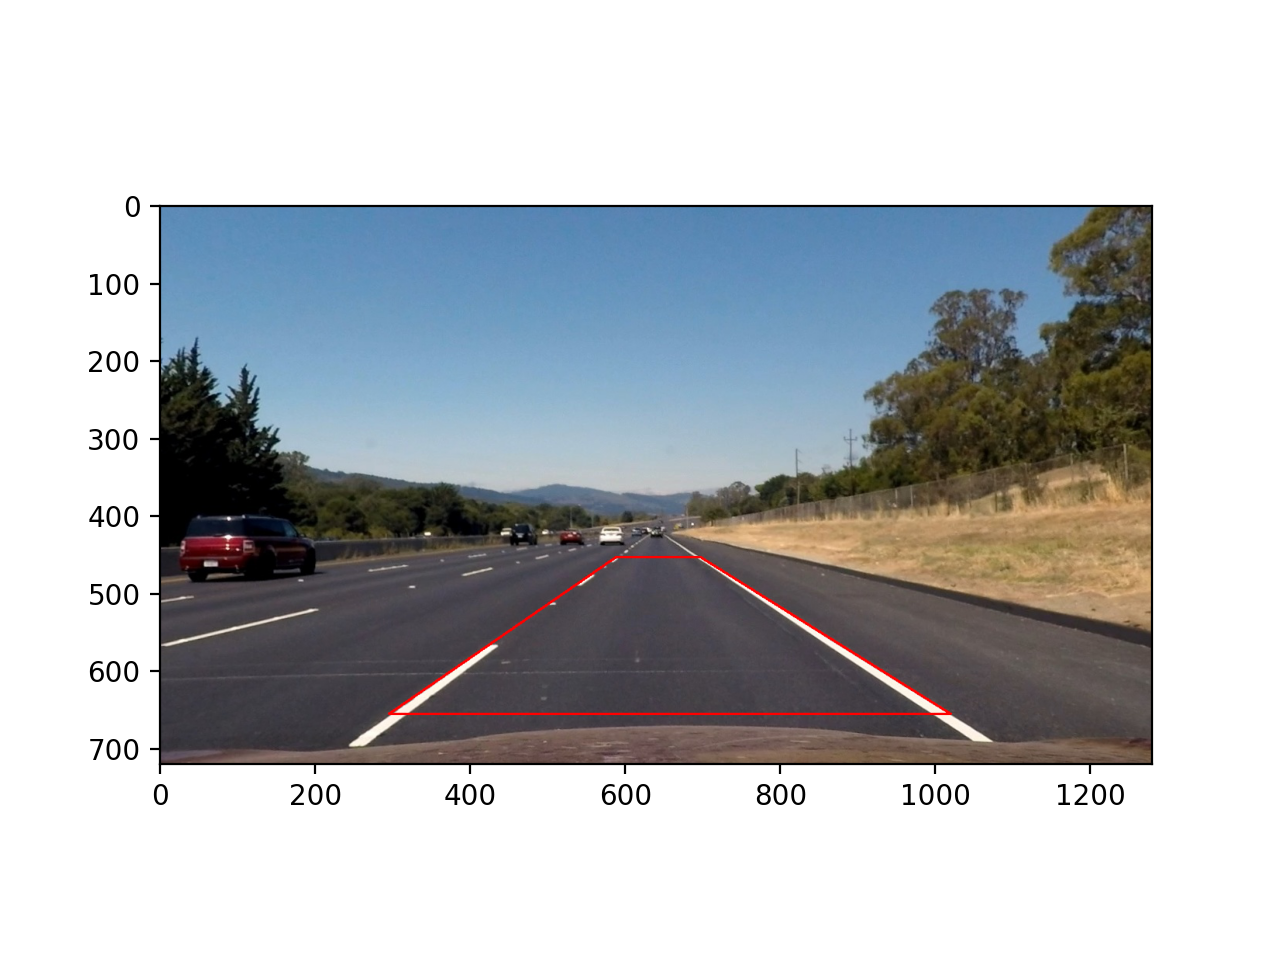

In [88]:

class RegionOfInterest:
    def __init__(self, img_size):
        (self.width, self.height) = img_size
        self.bottom_y = 0.910 * self.height
        self.horizon_y = 0.630 * self.height
        self.bottom_left_x = 0.231 * self.width
        self.bottom_right_x = 0.797 * self.width
        self.horizon_left_x = 0.460 * self.width
        self.horizon_right_x = 0.545 * self.width

    @property
    def perspective(self):
        return np.float32(
            [
                [self.bottom_left_x, self.bottom_y],
                [self.horizon_left_x, self.horizon_y],
                [self.horizon_right_x, self.horizon_y],
                [self.bottom_right_x, self.bottom_y],
            ]
        )

    @property
    def rectangle(self):
        return np.float32(
            [
                [self.bottom_left_x, self.height],
                [self.bottom_left_x, 0],
                [self.bottom_right_x, 0],
                [self.bottom_right_x, self.height],
            ]
        )

image = mpimg.imread('output_images/undistorted_test_images/undistorted_test_images_7.jpg')
region = RegionOfInterest((1280,720))
cv2.polylines(image, [np.int32(region.perspective).reshape((-1,1,2))], True, (255,0,0), thickness=2)
plt.imshow(image)



[[162.   655.2 ]
 [331.92 453.6 ]
 [388.8  453.6 ]
 [573.84 655.2 ]]


<IPython.core.display.Javascript object>


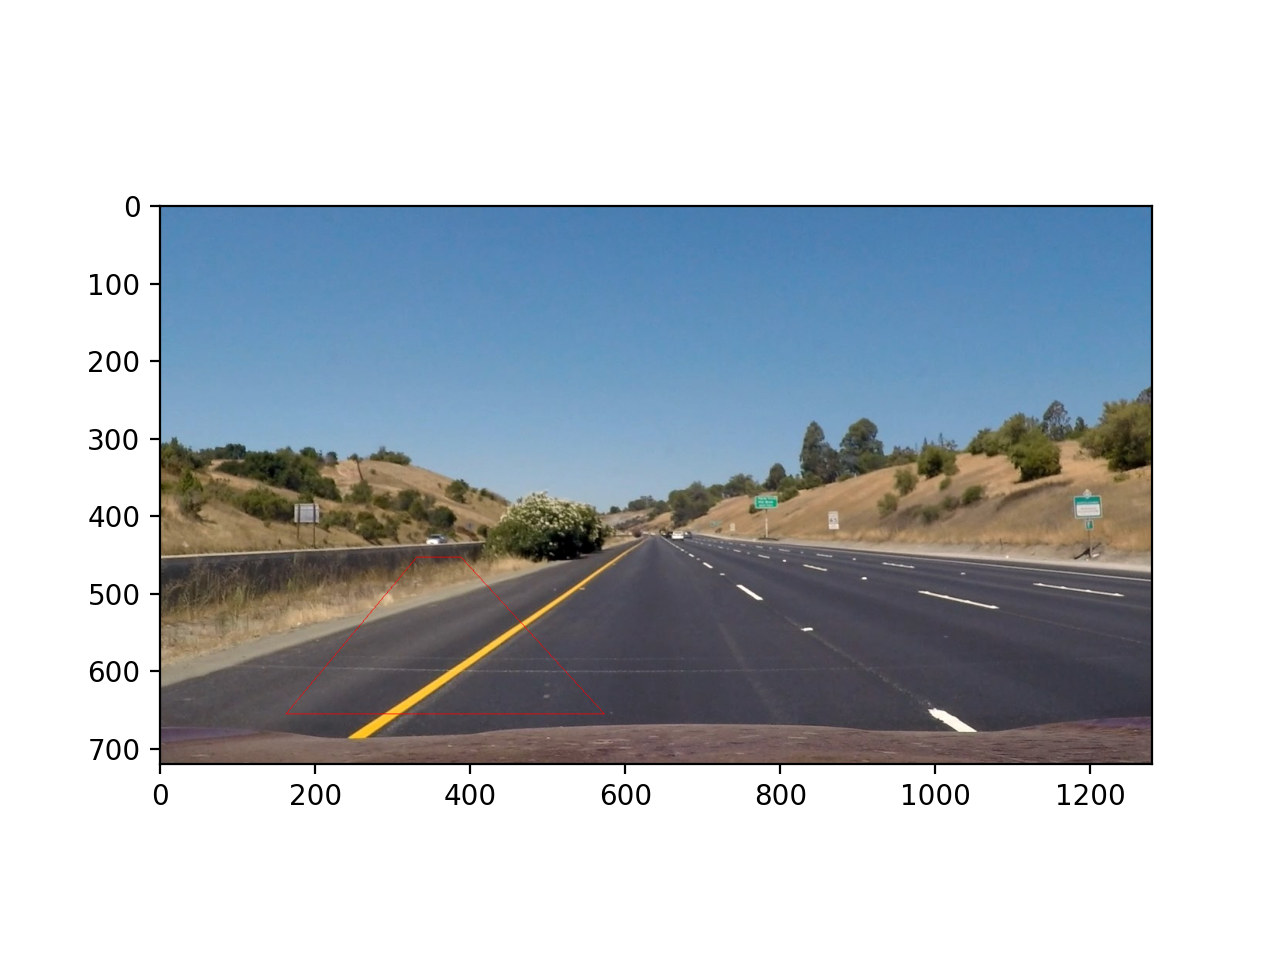

In [75]:
image = mpimg.imread('test_images/straight_lines1.jpg')
original_image = np.copy(image)
bottom_y = 0.910*height
horizon_y = 0.630*height
bottom_left_x = 0.225*width
bottom_right_x = 0.797*width
horizon_left_x = 0.461*width
horizon_right_x = 0.540*width

source = np.float32([ [bottom_left_x, bottom_y], [horizon_left_x, horizon_y], [horizon_right_x, horizon_y], [bottom_right_x, bottom_y]])
cv2.polylines(image, [np.int32(source).reshape((-1,1,2))], True, (255,0,0), thickness=1)
plt.imshow(image)


In [70]:

(width,height) = (1280,720)

source = np.float32([ [bottom_left_x, bottom_y], [horizon_left_x, horizon_y], [horizon_right_x, horizon_y], [bottom_right_x, bottom_y]])
target = np.float32([[bottom_left_x, height], [bottom_left_x,   0.], [bottom_right_x,  0.], [bottom_right_x, height]])
M = cv2.getPerspectiveTransform(source, target)
Minv = cv2.getPerspectiveTransform(target, source)

warped = cv2.warpPerspective(original_image, M, (width, height))

cv2.polylines(warped, [np.int32(target).reshape((-1,1,2))], True, (255,0,0), thickness=5)

plt.imshow(warped)


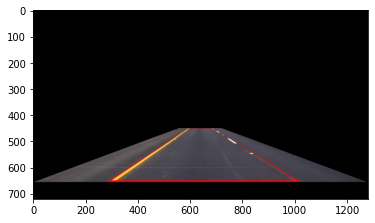

In [49]:

blab = np.copy(warped)
plt.imshow(cv2.warpPerspective(blab, Minv, (width, height)))
